# Notebook del Curso completo de NLP Parte 4

Link al video de youtube:  
https://www.youtube.com/watch?v=9x1QtYNLJRY&list=PL7HAy5R0ehQVdPVLV6pIJA9ZE2vVyLRxX&index=1


# Ejercicio integrador

Laboratorio práctico del curso de NLP, donde se aplicarán los conceptos del notebook previo. Vamos a trabajar con el dataset de kaggle, se puede reemplazar por otro archivo como libros, se necesita tener el titulo, género y una breve descripción.

## Importar librerías

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("carolzhangdc/imdb-5000-movie-dataset")

print("Path to dataset files:", path)

100%|██████████| 554k/554k [00:00<00:00, 1.02MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/carolzhangdc/imdb-5000-movie-dataset/versions/1


## Exploración de datos
Vamos a revisar lo que hay en el dataset, las columnas que posee y los valores nulos.

In [ ]:
import  pandas as pd

df = pd.read_csv(path + '/movie_metadata.csv')
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

El dataset posee varias columnas con valores nulos en sus filas
## Transformación de columnas

In [ ]:
df['genres'] = df['genres'].str.replace('|', ' ')
df['plot_keywords'] = df['plot_keywords'].str.replace('|', ' ')

df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action Adventure Fantasy Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action Adventure Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action Adventure Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
df['texto'] = df[['genres', 'plot_keywords']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df['texto']

,texto
0,Action Adventure Fantasy Sci-Fi avatar future ...
1,Action Adventure Fantasy goddess marriage cere...
2,Action Adventure Thriller bomb espionage seque...
3,Action Thriller deception imprisonment lawless...
4,Documentary nan
...,...
5038,Comedy Drama fraud postal worker prison theft ...
5039,Crime Drama Mystery Thriller cult fbi hideout ...
5040,Drama Horror Thriller nan
5041,Comedy Drama Romance nan


In [ ]:
row = df[['genres', 'plot_keywords', 'texto']].iloc[0]
print(row)

genres                             Action Adventure Fantasy Sci-Fi
plot_keywords               avatar future marine native paraplegic
texto            Action Adventure Fantasy Sci-Fi avatar future ...
Name: 0, dtype: object


In [ ]:
print(df['texto'].iloc[0])

Action Adventure Fantasy Sci-Fi avatar future marine native paraplegic


## TF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

tfidfVectorizer = TfidfVectorizer(max_features=2000)

X =  tfidfVectorizer.fit_transform(df['texto'])


In [ ]:
peliculas = pd.Series(df.index, index=df['movie_title'])
peliculas

,0
movie_title,
Avatar,0
Pirates of the Caribbean: At World's End,1
Spectre,2
The Dark Knight Rises,3
Star Wars: Episode VII - The Force Awakens,4
...,...
Signed Sealed Delivered,5038
The Following,5039
A Plague So Pleasant,5040


Quitar los espacios en blanco antes y despues del titulo

In [ ]:
peliculas.index = peliculas.index.str.strip()
peliculas

,0
movie_title,
Avatar,0
Pirates of the Caribbean: At World's End,1
Spectre,2
The Dark Knight Rises,3
Star Wars: Episode VII - The Force Awakens,4
...,...
Signed Sealed Delivered,5038
The Following,5039
A Plague So Pleasant,5040


In [ ]:
indice = peliculas['The Dark Knight Rises'] # peliculas['My Date with Drew']
print(indice)
consulta = X[indice]
consulta

3


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (1, 2000)>

## Similitud de vectores
Calculamos las similitudes del elemento 5042

In [ ]:
similitud = cosine_similarity(consulta, X)
similitud

array([[0.02767798, 0.02180518, 0.18356101, ..., 0.05069847, 0.        ,
        0.        ]])

Accedemos a un elemento en particular

In [ ]:
similitud[0][3]

np.float64(1.0000000000000002)

In [ ]:
similitud = similitud.flatten()
similitud[3]

np.float64(1.0000000000000002)

Flatten: convierte a un array unidimensional por eso se puede acceder al elemento 'similitud[4] vs similitud[0][4]'
## Gráfico de similitud

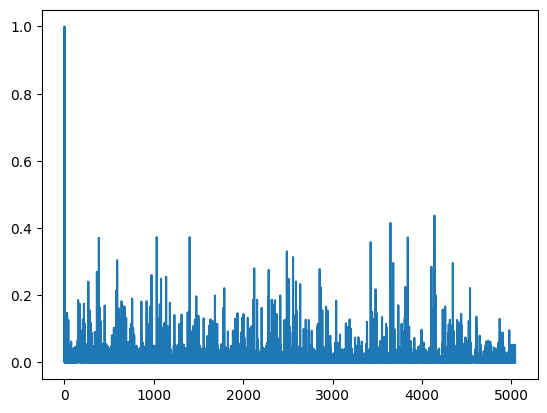

In [ ]:
import matplotlib.pyplot as plt
plt.plot(similitud)

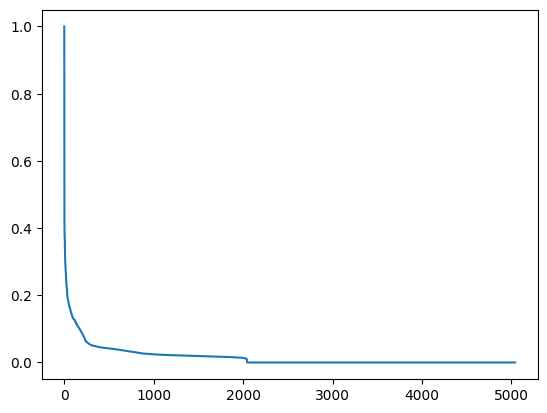

In [ ]:
plt.plot(similitud[(-similitud).argsort()])

## Buscamos recomedación de una peli

In [ ]:
recomendacion = (-similitud).argsort()[1:11]

In [ ]:
df['movie_title'].iloc[recomendacion]

,movie_title
4139,AWOL-72
3647,Deadfall
1034,The One
1402,Lethal Weapon 3
3841,Police Academy
387,The Devil's Own
3426,Swelter
2489,Let's Be Cops
2558,Hot Fuzz
591,Die Hard 2


## Generamos una función

Dada una película mostrará las películas similares

In [ ]:
def get_movie_index(movie:str, data_peliculas):
  if not isinstance(movie, str):
      print(f"⚠️ Error: El valor ingresado '{movie}' no es un texto (string) válido.")
      return None
  indice = data_peliculas.get(movie)
  if indice is None:
      print(f"❌ Error: La película '{movie}' no se encuentra en la lista.")
      return None

  # 3. Retorno del índice si todo es correcto
  return indice

def get_similarity_movie(movie:str):
  indice = get_movie_index(movie, peliculas)
  if indice is None:
      return None

  consulta = X[indice]
  similitud = cosine_similarity(consulta.reshape(1, -1), X)
  similitud = similitud.flatten()

  recomendacion = (-similitud).argsort()[1:11]

  return df['movie_title'].iloc[recomendacion]



In [ ]:
get_similarity_movie('Lethal Weapon 3')


,movie_title
3841,Police Academy
4139,AWOL-72
3647,Deadfall
1034,The One
3426,Swelter
2558,Hot Fuzz
3678,Mambo Italiano
2489,Let's Be Cops
2286,Triple 9
4345,The Marine 4: Moving Target


In [ ]:
get_similarity_movie('Barbie')


❌ Error: La película 'Barbie' no se encuentra en la lista.
